In [1]:
import tkinter as tk
from tkinter import filedialog
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

In [3]:
data = pd.read_csv(file_path)

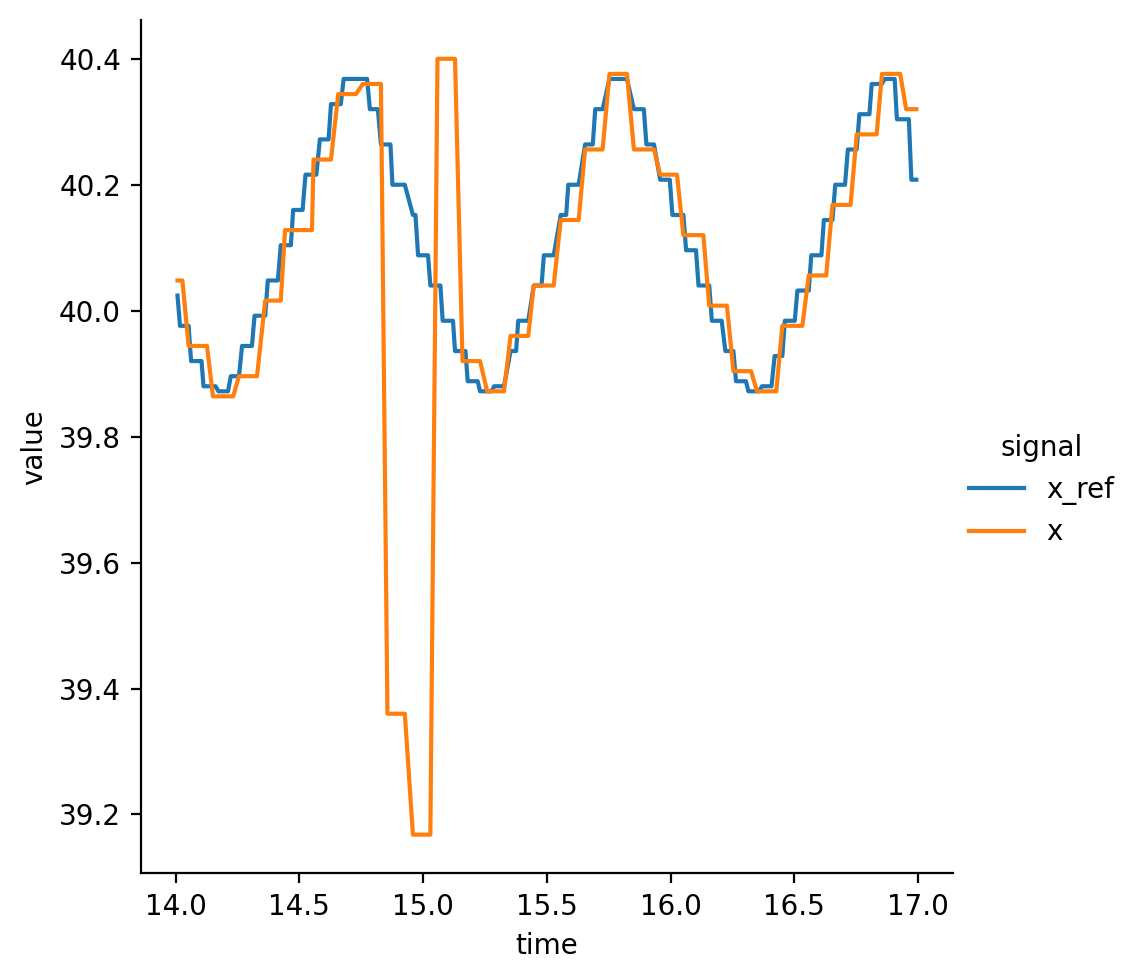

In [62]:
a4_dims = (11.7, 8.27)
p = sns.relplot(data=data.loc[((data['signal'] == 'x') | (data['signal'] == 'x_ref')) & (data['time'] > 14) & (data['time'] < 17)], kind="line", x='time', y='value', hue='signal')
p.fig.set_dpi(200)

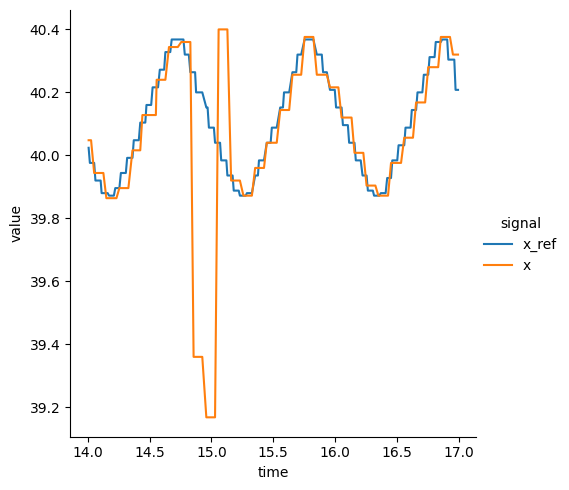

In [87]:
a4_dims = (11.7, 8.27)
p = sns.relplot(data=data.loc[((data['signal'] == 'x') | (data['signal'] == 'x_ref')) & (data['time'] > 14) & (data['time'] < 17)], kind="line", x='time', y='value', hue='signal')
ax = p.axes[0,0]
p.

In [54]:
data.query("signal in ('x','z')")

,Unnamed: 0,time,signal,value
1,1,0.000000,x,0.0
3,3,0.000000,z,0.0
10,10,0.008417,x,0.0
12,12,0.008417,z,0.0
19,19,0.015411,x,0.0
...,...,...,...,...
27912,27912,38.054531,z,0.0
27919,27919,38.065700,x,0.0
27921,27921,38.065700,z,0.0
27928,27928,38.074969,x,0.0


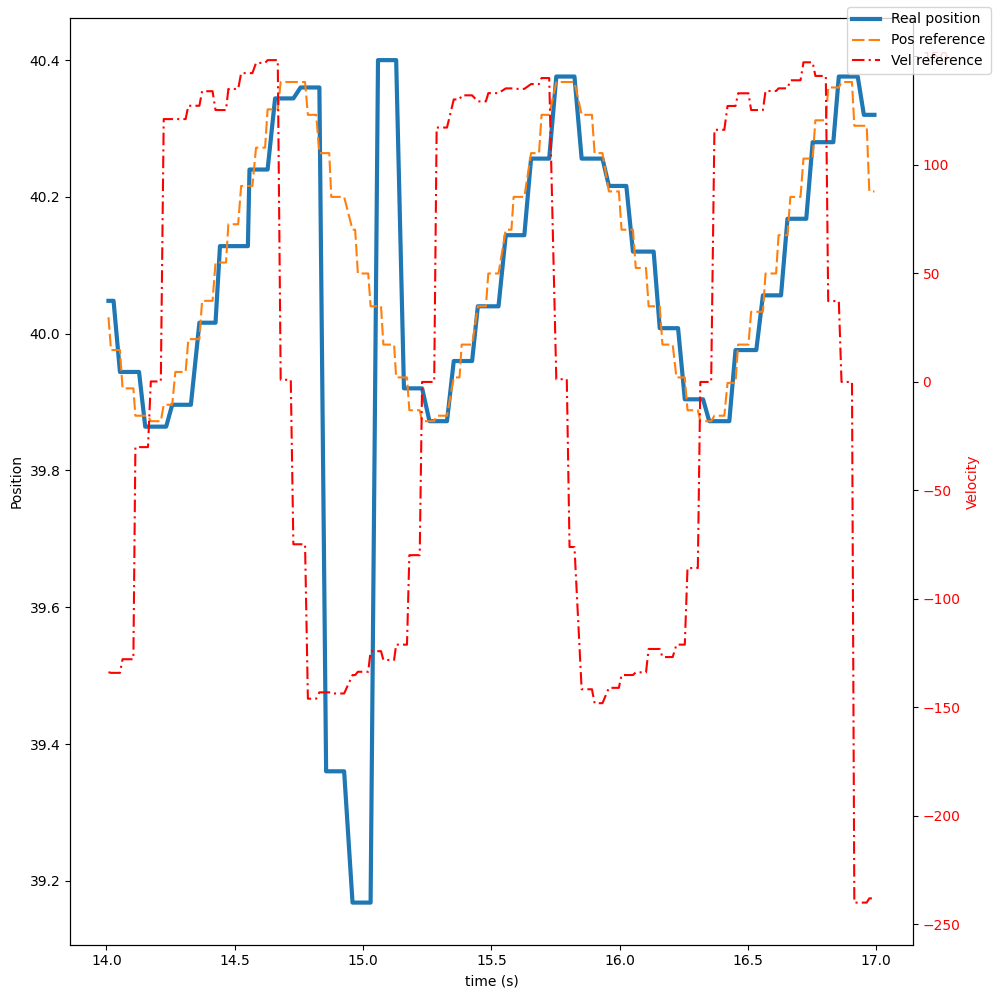

In [120]:
dataframe_x = data.loc[(data['signal'] == 'x') & (data['time'] > 14) & (data['time'] < 17)]
dataframe_x_ref = data.loc[(data['signal'] == 'x_ref') & (data['time'] > 14) & (data['time'] < 17)]
dataframe_x_vel = data.loc[(data['signal'] == 'vel_ref_x') & (data['time'] > 14) & (data['time'] < 17)]

x = dataframe_x.time
y = dataframe_x.value
x2 = dataframe_x_ref.time
y2 = dataframe_x_ref.value
x3 = dataframe_x_vel.time
y3 = dataframe_x_vel.value

# Change the default figure size

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlabel('time (s)')
# Change the default marker for the scatter from circles to x's
ax1.plot(x, y, linewidth=3, label="Real position")
ax1.plot(x2, y2, dashes=[6, 2], label="Pos reference")
ax1.set_ylabel('Position')
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
ax2.plot(x3, y3, dashes=[6, 2,1,2], color='r', label="Vel reference")
ax2.set_ylabel('Velocity', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [12]:
import csv
import sys
sys.path.insert(0, '/home/fernando/Dropbox/UC/Magister/robot-flautista')

with open("filtro_vel.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    model = []
    for i in csv_reader:
        model.append(list(map(lambda k: float(k), i)))
    B = model[0]
    A = model[1]

    print(B)
    print(A)


[0.011280460670486336, 0.008188636794809034, 0.04114585876113964, 0.03523988244656469, 0.06854989307784137, 0.05376371121434875, 0.06854989307784137, 0.03523988244656469, 0.04114585876113963, 0.00818863679480903, 0.011280460670486332]
[1.0, -3.9123909405655466, 9.72805830524996, -16.347115982342093, 20.85103153158084, -20.299813137268213, 15.37509234455613, -8.851249177308143, 3.748330304835091, -1.0600780281723554, 0.15851556996089422]
